In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/Income1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


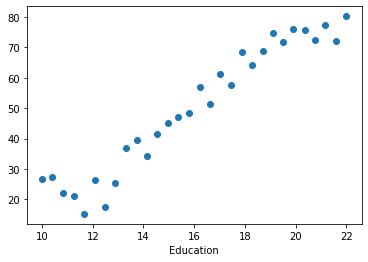

In [7]:
plt.scatter(data.Education,data.Income)
plt.xlabel("Education")
plt.show()

In [8]:
from torch import nn

数据预处理

In [9]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [10]:
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [11]:
#w @ input + b 等价于model(input)
model = nn.Linear(1,1)

In [12]:
loss_fn = nn.MSELoss() #损失函数

In [13]:
opt = torch.optim.SGD(model.parameters(),lr = 0.0001)

In [14]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_pred = model(x)         #使用模型预测
        loss = loss_fn(y,y_pred)  #根据预测结果计算损失
        opt.zero_grad()           #把变量梯度清零
        loss.backward()           #求解梯度
        opt.step()                #优化模型参数

In [15]:
model.weight

Parameter containing:
tensor([[4.9866]], requires_grad=True)

In [16]:
model.bias

Parameter containing:
tensor([-28.5918], requires_grad=True)

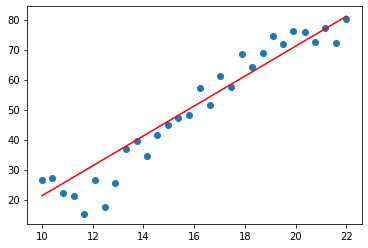

In [18]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),model(X).data.numpy(),c='r')